In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

explained variance ratio (first two components): [0.99809123 0.00173592]


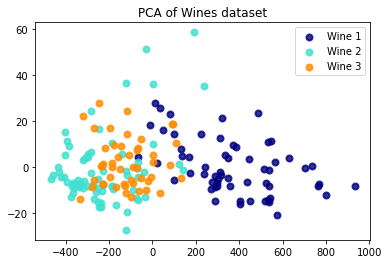

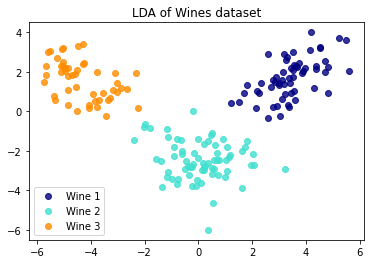

In [135]:
wines = pd.read_csv('wine_data.csv',sep = ',', header=0)

X = wines.drop('class', axis = 'columns')
y = np.array(wines['class'])
target_names = ['Wine 1', 'Wine 2', 'Wine 3']

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wines dataset')

plt.figure()
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Wines dataset')

plt.show()

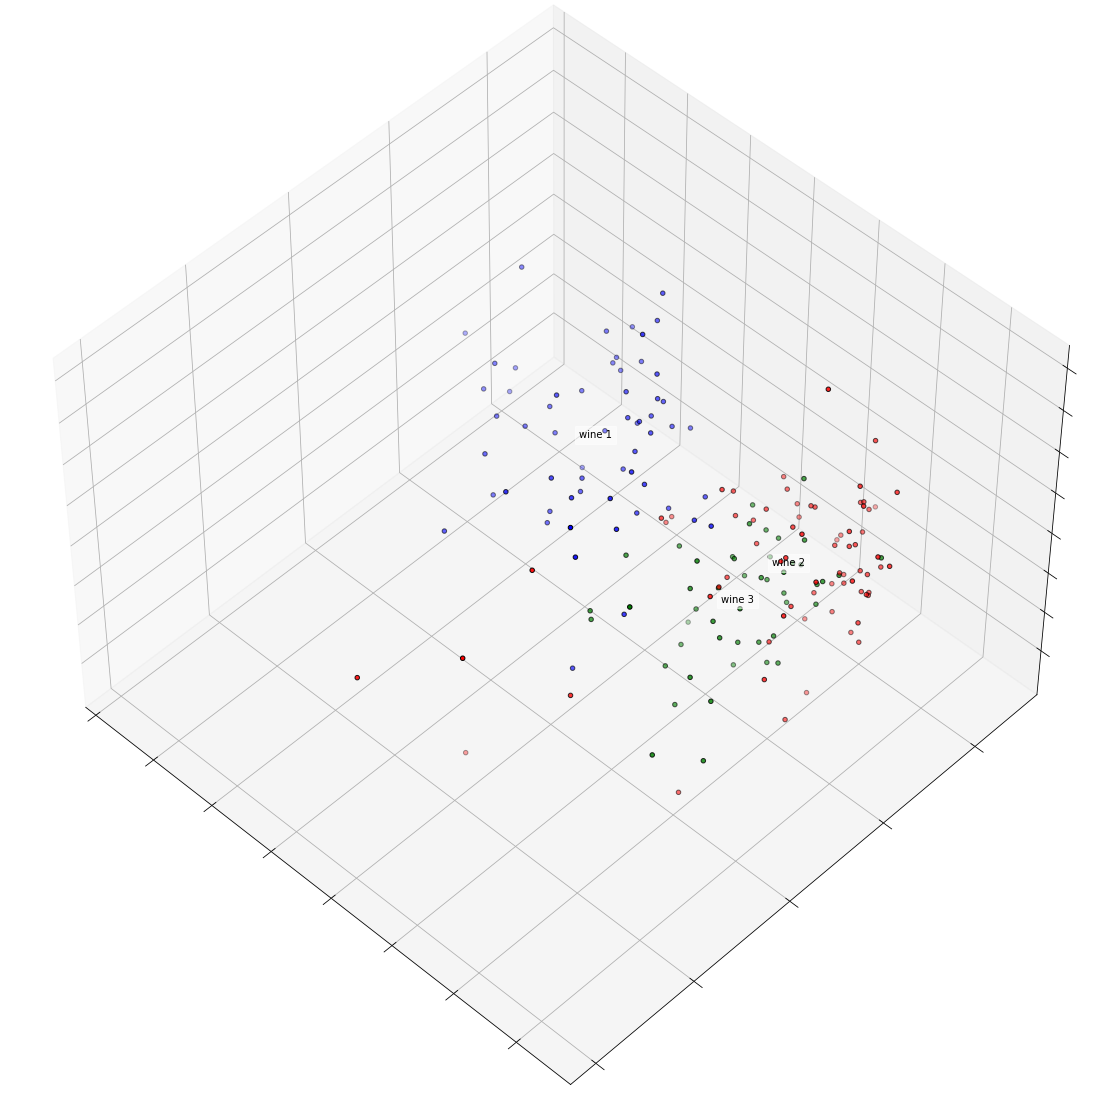

In [134]:
from mpl_toolkits.mplot3d import Axes3D
import itertools

colors = itertools.cycle(["b", "r", "g"])

from sklearn import decomposition
centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(20, 15))
plt.clf()
pca = decomposition.PCA(n_components=3)
X_r = pca.fit_transform(X)

ax = fig.add_subplot(projection='3d')

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134,auto_add_to_figure=False)
fig.add_axes(ax)
for name, label in [('wine 1', 1), ('wine 2', 2), ('wine 3', 3)]:
    ax.text3D(X_r[y == label, 0].mean(),
              X_r[y == label, 1].mean(),
              X_r[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
for i in ([1,2,3]):
    ax.scatter(X_r[y == i, 0], X_r[y == i, 1], X_r[y == i, 2], c=[next(colors)],
    edgecolor='black')


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()